In [73]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from mega.routines import mega_routine
from plots import regret_plt

In [74]:
#  UNIVERSE PARAMETERS
n_users = 3
n_arms = 5
t_horizon = 2000
arm_means = [0.2, 0.3, 0.5, 0.8, 0.9]
best_arms_mean = np.sort(arm_means)[-n_users:]
# MONTE-CARLO PARAMETERS
mc_horizon = 50
param_vars = 10

In [75]:
# MEGA PARAMETERS
mega_params = {
    'c': 0.1,
    'd': 0.05,
    'alpha': 0.5,
    'beta': 0.8,
    'persistence_proba_init': 0.6
}

# beta

In [76]:
mega_rewards = np.zeros((param_vars, t_horizon))
for i in range(mc_horizon):  # we do a Monte Carlo estimation
    for t in range(param_vars):
        mega_params['beta'] = 0.1 * t
        rewards, collisions = mega_routine(n_users, mega_params, n_arms, t_horizon, arm_means, alg='ts')
        mega_rewards[t, :] += np.sum(rewards, axis=0)
mega_rewards /= mc_horizon

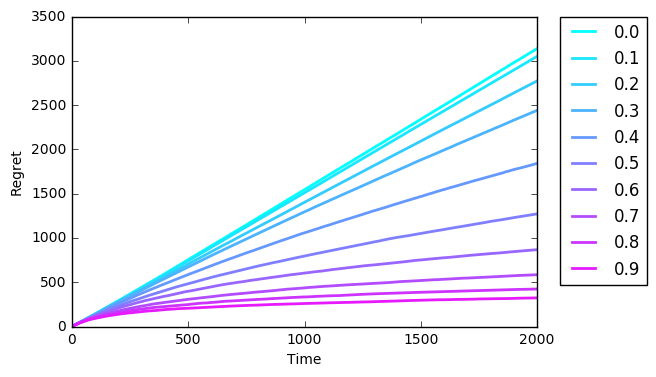

In [77]:
plt.ylabel("Regret")
plt.xlabel("Time")
cmap = plt.get_cmap("cool")

for t in range(param_vars):
    regret = np.cumsum(best_arms_mean.sum() - mega_rewards[t])
    plt.plot(regret, linewidth=2, color=cmap(0.1*t), label="0."+str(t))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# persistence_proba_init

In [78]:
# MEGA PARAMETERS
mega_params = {
    'c': 0.1,
    'd': 0.05,
    'alpha': 0.5,
    'beta': 0.8,
    'persistence_proba_init': 0.6
}

In [ ]:
mega_rewards = np.zeros((param_vars, t_horizon))
for i in range(mc_horizon):
    for t in range(param_vars):
        mega_params['persistence_proba_init'] = 0.05 * t + 0.5
        rewards, collisions = mega_routine(n_users, mega_params, n_arms, t_horizon, arm_means, alg='ts')
        mega_rewards[t, :] += np.sum(rewards, axis=0)
mega_rewards /= mc_horizon

In [ ]:
plt.ylabel("Regret")
plt.xlabel("Time")
cmap = plt.get_cmap("PuRd")

for t in range(param_vars):
    regret = np.cumsum(best_arms_mean.sum() - mega_rewards[t])
    plt.plot(regret, linewidth=2, color=cmap(1-0.1*t), label="0."+str(50+t*5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# persistence proba init